# 1. Introduction
The aim of this notebook is to do data cleaning on a real life [dataset.](https://www.kaggle.com/datasets/nycparks/tree-census) <br>
Adapted from [Mısra Turp's](https://www.youtube.com/watch?v=qxpKCBV60U4) YouTube video. <br>
**If you're reading this, please upvote.**

In [1]:
# libraries
import os
import numpy as np
import pandas as pd
import warnings; warnings.filterwarnings("ignore")

# unhide all rows and columns
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

# 2. Exploring Data
Load the data and have a look at it.

In [2]:
tree = pd.read_csv("../input/tree-census/new_york_tree_census_2015.csv")
tree

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,zipcode,zip_city,cb_num,borocode,boroname,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp
0,606945,305778,2016-06-28,10,0,OnCurb,Alive,Good,Fraxinus pennsylvanica,green ash,None,None,NoDamage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,76-046 164 STREET,11366,Fresh Meadows,408,4,Queens,24,25,14,QN37,Kew Gardens Hills,4125700,New York,40.724339,-73.805180,1.038250e+06,203232.9417
1,160321,341273,2015-08-19,9,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,NoDamage,Volunteer,BranchLights,No,No,No,No,No,No,Yes,No,No,72-020 32 AVENUE,11370,East Elmhurst,403,4,Queens,25,34,13,QN28,Jackson Heights,4030902,New York,40.756626,-73.894167,1.013571e+06,214953.6472
2,541347,325281,2015-12-30,7,0,OnCurb,Alive,Good,Pyrus calleryana,Callery pear,None,None,NoDamage,TreesCount Staff,BranchLights,No,No,No,No,No,No,Yes,No,No,153-026 119 AVENUE,11434,Jamaica,412,4,Queens,28,32,10,QN76,Baisley Park,4028800,New York,40.679777,-73.788463,1.042923e+06,187008.2671
3,613930,203822,2016-07-05,10,0,OnCurb,Alive,Good,Pyrus calleryana,Callery pear,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,89 89 STREET,11209,Brooklyn,310,3,Brooklyn,43,46,22,BK31,Bay Ridge,3005000,New York,40.622743,-74.037543,9.738279e+05,166160.5847
4,18353,338911,2015-06-13,4,0,OnCurb,Alive,Good,Prunus virginiana,'Schubert' chokecherry,None,None,NoDamage,TreesCount Staff,BranchLights,No,No,No,No,No,No,Yes,No,No,559 BEACH 68 STREET,11692,Arverne,414,4,Queens,31,31,10,QN12,Hammels-Arverne-Edgemere,4095400,New York,40.596514,-73.797622,1.040452e+06,156667.5017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,237788,223344,2015-09-19,2,0,OnCurb,Alive,Poor,Prunus cerasifera,purple-leaf plum,1or2,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,1 BEARD STREET,11231,Brooklyn,306,3,Brooklyn,38,51,25,BK33,Carroll Gardens-Columbia Street-Red Hook,3005300,New York,40.672566,-74.011473,9.810674e+05,184310.4162
683784,249489,335314,2015-09-23,2,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,NYC Parks Staff,NaN,No,No,No,No,No,No,No,No,No,87-015 LITTLE NECK PARKWAY,11001,Floral Park,413,4,Queens,23,33,11,QN44,Glen Oaks-Floral Park-New Hyde Park,4157903,New York,40.730434,-73.710600,1.064458e+06,205525.7957
683785,230261,230303,2015-09-16,2,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,644 EAST 8 STREET,11230,Brooklyn,314,3,Brooklyn,40,44,17,BK42,Flatbush,3048200,New York,40.633890,-73.969779,9.926380e+05,170220.9185
683786,623784,318368,2016-07-12,18,0,OnCurb,Alive,Good,Quercus rubra,northern red oak,None,None,Damage,NYC Parks Staff,None,No,No,No,No,No,No,No,No,No,116-019 125 STREET,11420,South Ozone Park,410,4,Queens,28,31,10,QN55,South Ozone Park,4017800,New York,40.676190,-73.813135,1.036082e+06,185685.7796


Remove the columns that are not about trees.

In [3]:
tree.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam', 'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward', 'guards', 'sidewalk', 'user_type', 'problems', 'root_stone', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other', 'address', 'zipcode', 'zip_city', 'cb_num', 'borocode', 'boroname', 'cncldist', 'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state', 'latitude', 'longitude', 'x_sp', 'y_sp'], dtype='object')

In [4]:
tree_sub = tree[['tree_id', 'tree_dbh', 'stump_diam', 'curb_loc', 'status', 'health', 'spc_latin', 'steward', 'sidewalk', 'problems', 'root_stone', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other']]
tree_sub

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,606945,10,0,OnCurb,Alive,Good,Fraxinus pennsylvanica,None,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
1,160321,9,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,NoDamage,BranchLights,No,No,No,No,No,No,Yes,No,No
2,541347,7,0,OnCurb,Alive,Good,Pyrus calleryana,None,NoDamage,BranchLights,No,No,No,No,No,No,Yes,No,No
3,613930,10,0,OnCurb,Alive,Good,Pyrus calleryana,None,NoDamage,None,No,No,No,No,No,No,No,No,No
4,18353,4,0,OnCurb,Alive,Good,Prunus virginiana,None,NoDamage,BranchLights,No,No,No,No,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,237788,2,0,OnCurb,Alive,Poor,Prunus cerasifera,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
683784,249489,2,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683785,230261,2,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683786,623784,18,0,OnCurb,Alive,Good,Quercus rubra,None,Damage,None,No,No,No,No,No,No,No,No,No


Check for missing values if there is any.

In [5]:
tree_sub.isna().sum()

tree_id           0
tree_dbh          0
stump_diam        0
curb_loc          0
status            0
health        31616
spc_latin     31619
steward       31615
sidewalk      31616
problems      31664
root_stone        0
root_grate        0
root_other        0
trunk_wire        0
trnk_light        0
trnk_other        0
brch_light        0
brch_shoe         0
brch_other        0
dtype: int64

In [6]:
tree_sub[tree_sub.health.isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
14,428425,2,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
16,341736,12,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
50,211906,0,6,OffsetFromCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
56,174662,0,7,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
75,470185,5,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683671,355649,0,89,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683697,502507,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683698,201610,0,8,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683784,249489,2,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


Looks like trees with NaN health values are either dead or stump. <br>
Let's check this assumption.

In [7]:
tree_sub[tree_sub.health.isna()].status.value_counts()

Stump    17654
Dead     13961
Alive        1
Name: status, dtype: int64

In [8]:
tree_sub[(tree_sub.health.isna())&(tree_sub.status=="Alive")]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
297358,245041,16,0,OnCurb,Alive,NaN,Fraxinus pennsylvanica,None,Damage,None,No,No,No,No,No,No,No,No,No


Probably a typo. <br>
If a tree is not "Alive" then other information is left blank.

array([[<AxesSubplot:title={'center':'tree_id'}>,
        <AxesSubplot:title={'center':'tree_dbh'}>],
       [<AxesSubplot:title={'center':'stump_diam'}>, <AxesSubplot:>]],
      dtype=object)

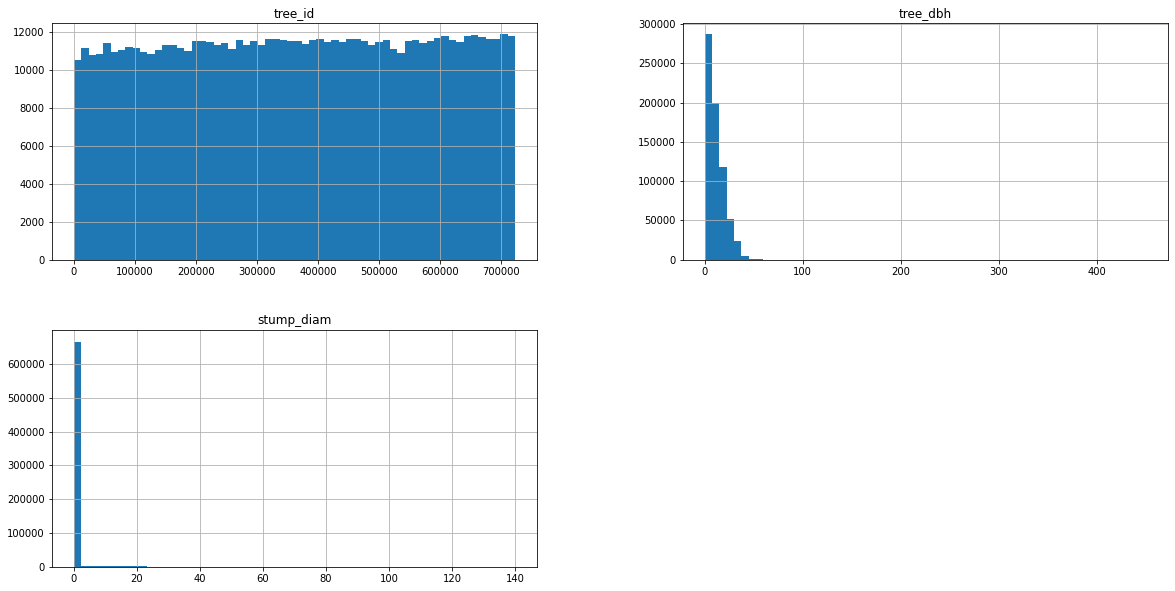

In [9]:
tree_sub.hist(bins=60, figsize=(20,10))

In [10]:
tree_sub["steward"].value_counts()

None       487823
1or2       143557
3or4        19183
4orMore      1610
Name: steward, dtype: int64

In [11]:
tree_sub["curb_loc"].value_counts()

OnCurb            656896
OffsetFromCurb     26892
Name: curb_loc, dtype: int64

In [12]:
deads = tree_sub[(tree_sub.status=="Dead")]
deads

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
14,428425,2,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
16,341736,12,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
75,470185,5,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
78,428925,2,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
170,301347,9,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683550,368892,4,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683555,94569,3,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683602,691350,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683784,249489,2,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


In [13]:
stumps = tree_sub[(tree_sub.status=="Stump")]
stumps

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
50,211906,0,6,OffsetFromCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
56,174662,0,7,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
88,221756,0,21,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
164,574957,0,27,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
167,674107,0,4,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683511,237100,0,24,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683523,502705,0,6,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683671,355649,0,89,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683697,502507,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


# 3. Cleaning Data
## 3.1. Removing NaN Values
Continue with filling NaN values.

In [14]:
tree_sub.loc[(tree_sub.status=="Dead") | (tree_sub.status=="Stump")] = tree_sub.loc[(tree_sub.status=="Dead") | (tree_sub.status=="Stump")].fillna("NA")
tree_sub

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,606945,10,0,OnCurb,Alive,Good,Fraxinus pennsylvanica,None,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
1,160321,9,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,NoDamage,BranchLights,No,No,No,No,No,No,Yes,No,No
2,541347,7,0,OnCurb,Alive,Good,Pyrus calleryana,None,NoDamage,BranchLights,No,No,No,No,No,No,Yes,No,No
3,613930,10,0,OnCurb,Alive,Good,Pyrus calleryana,None,NoDamage,None,No,No,No,No,No,No,No,No,No
4,18353,4,0,OnCurb,Alive,Good,Prunus virginiana,None,NoDamage,BranchLights,No,No,No,No,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,237788,2,0,OnCurb,Alive,Poor,Prunus cerasifera,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
683784,249489,2,0,OnCurb,Dead,NA,NA,NA,NA,NA,No,No,No,No,No,No,No,No,No
683785,230261,2,0,OnCurb,Dead,NA,NA,NA,NA,NA,No,No,No,No,No,No,No,No,No
683786,623784,18,0,OnCurb,Alive,Good,Quercus rubra,None,Damage,None,No,No,No,No,No,No,No,No,No


In [15]:
tree_sub.isna().sum()

tree_id        0
tree_dbh       0
stump_diam     0
curb_loc       0
status         0
health         1
spc_latin      5
steward        0
sidewalk       1
problems      49
root_stone     0
root_grate     0
root_other     0
trunk_wire     0
trnk_light     0
trnk_other     0
brch_light     0
brch_shoe      0
brch_other     0
dtype: int64

A few left, keep going.

In [16]:
tree_sub.sidewalk.value_counts()

NoDamage    464978
Damage      187194
NA           31615
Name: sidewalk, dtype: int64

In [17]:
tree_sub.loc[tree_sub.sidewalk.isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
135065,540677,7,0,OffsetFromCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,NaN,None,No,No,No,No,No,No,No,No,No


Fill with most common value.

In [18]:
tree_sub.sidewalk = tree_sub.sidewalk.fillna("NoDamage")

In [19]:
tree_sub.loc[tree_sub["spc_latin"].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
132498,630814,11,0,OnCurb,Alive,Poor,NaN,None,Damage,NaN,No,No,No,No,No,No,No,No,No
146411,47941,5,0,OnCurb,Alive,Good,NaN,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
152825,651014,40,0,OnCurb,Alive,Good,NaN,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
322029,150745,3,0,OnCurb,Alive,Good,NaN,1or2,Damage,None,No,No,No,No,No,No,No,No,No
643812,562532,4,0,OnCurb,Alive,Good,NaN,1or2,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No


In [20]:
tree_sub["spc_latin"].value_counts()

Platanus x acerifolia                 87014
Gleditsia triacanthos var. inermis    64264
Pyrus calleryana                      58931
Quercus palustris                     53185
Acer platanoides                      34189
                                      ...  
Pinus nigra                              37
Pinus rigida                             33
Maclura pomifera                         29
Pinus sylvestris                         25
Pinus virginiana                         10
Name: spc_latin, Length: 133, dtype: int64

Better fill with "NA".

In [21]:
tree_sub.loc[tree_sub["spc_latin"].isna()] = tree_sub.loc[tree_sub["spc_latin"].isna()].fillna("NA")

In [22]:
tree_sub.loc[tree_sub.health.isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
297358,245041,16,0,OnCurb,Alive,NaN,Fraxinus pennsylvanica,None,Damage,None,No,No,No,No,No,No,No,No,No


In [23]:
tree_sub.health.value_counts()

Good    528850
Fair     96504
NA       31615
Poor     26818
Name: health, dtype: int64

Since there is no damage nor problems are mentioned, replacing with "Good" would be fair. 

In [24]:
tree_sub.loc[tree_sub.health.isna()] = tree_sub.loc[tree_sub.health.isna()].fillna("Good")

In [25]:
tree_sub[tree_sub.problems.isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
14233,332541,8,0,OnCurb,Alive,Good,Prunus,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
54156,701424,5,0,OnCurb,Alive,Good,Prunus,None,NoDamage,NaN,No,No,No,No,No,No,No,No,No
64918,701420,4,0,OnCurb,Alive,Good,Pyrus calleryana,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
93966,473680,8,0,OffsetFromCurb,Alive,Good,Cornus florida,None,NoDamage,NaN,No,No,No,No,No,No,No,No,No
95292,701426,8,0,OnCurb,Alive,Good,Pyrus calleryana,None,NoDamage,NaN,No,No,No,No,No,No,No,No,No
102731,701436,7,0,OnCurb,Alive,Fair,Acer saccharinum,None,NoDamage,NaN,No,No,No,No,No,No,No,No,No
123054,332669,28,0,OffsetFromCurb,Alive,Fair,Quercus palustris,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
126951,332543,9,0,OnCurb,Alive,Good,Prunus,None,Damage,NaN,No,No,No,No,No,No,No,No,No
129374,332692,15,0,OffsetFromCurb,Alive,Good,Quercus palustris,None,NoDamage,NaN,No,No,No,No,No,No,No,No,No
131965,332670,24,0,OffsetFromCurb,Alive,Fair,Quercus palustris,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No


In [26]:
tree_sub["problems"].value_counts()

None                                                    426280
Stones                                                   95673
NA                                                       31616
BranchLights                                             29452
StonesBranchLights                                       17808
                                                         ...  
StonesBranchLightsSneakersBranchOther                        1
MetalGratesRootOtherTrunkLightsTrunkOtherBranchOther         1
MetalGratesRootOtherTrunkLightsTrunkOther                    1
StonesRootOtherWiresRopeBranchLightsSneakers                 1
MetalGratesTrunkOtherBranchLightsBranchOther                 1
Name: problems, Length: 233, dtype: int64

In [27]:
tree_sub.loc[tree_sub["problems"].isna()] = tree_sub.loc[tree_sub["problems"].isna()].fillna("None")

In [28]:
tree_sub.isna().sum()

tree_id       0
tree_dbh      0
stump_diam    0
curb_loc      0
status        0
health        0
spc_latin     0
steward       0
sidewalk      0
problems      0
root_stone    0
root_grate    0
root_other    0
trunk_wire    0
trnk_light    0
trnk_other    0
brch_light    0
brch_shoe     0
brch_other    0
dtype: int64

## 3.2. Removing Outliers


In [29]:
outliers = tree_sub[(tree_sub["tree_dbh"]>60) | (tree_sub["stump_diam"]>60)]
outliers

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
5093,15545,0,89,OnCurb,Stump,NA,NA,NA,NA,NA,No,No,No,No,No,No,No,No,No
6651,154560,70,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,WiresRopeTrunkOtherBranchLights,No,No,No,Yes,No,Yes,Yes,No,No
22291,566835,94,0,OnCurb,Alive,Good,Platanus x acerifolia,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
23628,183910,127,0,OnCurb,Dead,NA,NA,NA,NA,NA,No,No,No,No,No,No,No,No,No
26788,330927,0,70,OnCurb,Stump,NA,NA,NA,NA,NA,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675212,97902,0,66,OnCurb,Stump,NA,NA,NA,NA,NA,No,No,No,No,No,No,No,No,No
677929,580646,0,70,OnCurb,Stump,NA,NA,NA,NA,NA,No,No,No,No,No,No,No,No,No
678636,338147,80,0,OnCurb,Alive,Fair,Prunus,None,NoDamage,BranchOther,No,No,No,No,No,No,No,No,Yes
681966,442390,0,76,OnCurb,Stump,NA,NA,NA,NA,NA,No,No,No,No,No,No,No,No,No


In [30]:
tree_sub = tree_sub[(tree_sub["tree_dbh"]<=60) & (tree_sub["stump_diam"]<=60)]
tree_sub

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,606945,10,0,OnCurb,Alive,Good,Fraxinus pennsylvanica,None,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
1,160321,9,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,NoDamage,BranchLights,No,No,No,No,No,No,Yes,No,No
2,541347,7,0,OnCurb,Alive,Good,Pyrus calleryana,None,NoDamage,BranchLights,No,No,No,No,No,No,Yes,No,No
3,613930,10,0,OnCurb,Alive,Good,Pyrus calleryana,None,NoDamage,None,No,No,No,No,No,No,No,No,No
4,18353,4,0,OnCurb,Alive,Good,Prunus virginiana,None,NoDamage,BranchLights,No,No,No,No,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,237788,2,0,OnCurb,Alive,Poor,Prunus cerasifera,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
683784,249489,2,0,OnCurb,Dead,NA,NA,NA,NA,NA,No,No,No,No,No,No,No,No,No
683785,230261,2,0,OnCurb,Dead,NA,NA,NA,NA,NA,No,No,No,No,No,No,No,No,No
683786,623784,18,0,OnCurb,Alive,Good,Quercus rubra,None,Damage,None,No,No,No,No,No,No,No,No,No


In [31]:
stats_alive = tree_sub[tree_sub["status"]=="Alive"].groupby("spc_latin")["tree_dbh"].describe().reset_index()[["spc_latin", "25%", "75%"]]
stats_alive

,spc_latin,25%,75%
0,Acer,7.0,15.0
1,Acer buergerianum,5.0,10.0
2,Acer campestre,4.0,9.0
3,Acer ginnala,4.0,10.0
4,Acer griseum,2.0,3.0
...,...,...,...
128,Tsuga canadensis,2.0,7.0
129,Ulmus americana,4.0,17.0
130,Ulmus parvifolia,3.0,10.0
131,Ulmus pumila,4.0,17.0


In [32]:
tree_alive = tree_sub[tree_sub["status"]=="Alive"]
tree_alive = tree_alive.merge(stats_alive, on="spc_latin", how="left")
tree_alive

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,25%,75%
0,606945,10,0,OnCurb,Alive,Good,Fraxinus pennsylvanica,None,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No,10.0,17.0
1,160321,9,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,NoDamage,BranchLights,No,No,No,No,No,No,Yes,No,No,6.0,13.0
2,541347,7,0,OnCurb,Alive,Good,Pyrus calleryana,None,NoDamage,BranchLights,No,No,No,No,No,No,Yes,No,No,6.0,11.0
3,613930,10,0,OnCurb,Alive,Good,Pyrus calleryana,None,NoDamage,None,No,No,No,No,No,No,No,No,No,6.0,11.0
4,18353,4,0,OnCurb,Alive,Good,Prunus virginiana,None,NoDamage,BranchLights,No,No,No,No,No,No,Yes,No,No,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652018,309254,7,0,OnCurb,Alive,Good,Acer platanoides 'Crimson King',None,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No,7.0,13.0
652019,171664,12,0,OnCurb,Alive,Good,Tilia americana,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No,4.0,12.0
652020,237788,2,0,OnCurb,Alive,Poor,Prunus cerasifera,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No,3.0,6.0
652021,623784,18,0,OnCurb,Alive,Good,Quercus rubra,None,Damage,None,No,No,No,No,No,No,No,No,No,4.0,16.0


Outliers will be removed by using Inter Quartile Range method. <br>
> IQR = Q3 - Q1

In [33]:
limits = tree_alive["tree_dbh"] < tree_alive["25%"]
tree_alive.loc[limits, "tree_dbh"] = tree_alive["25%"]

limits = tree_alive["tree_dbh"] > tree_alive["75%"]
tree_alive.loc[limits, "tree_dbh"] = tree_alive["75%"]

In [34]:
tree_alive

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,25%,75%
0,606945,10.0,0,OnCurb,Alive,Good,Fraxinus pennsylvanica,None,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No,10.0,17.0
1,160321,9.0,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,NoDamage,BranchLights,No,No,No,No,No,No,Yes,No,No,6.0,13.0
2,541347,7.0,0,OnCurb,Alive,Good,Pyrus calleryana,None,NoDamage,BranchLights,No,No,No,No,No,No,Yes,No,No,6.0,11.0
3,613930,10.0,0,OnCurb,Alive,Good,Pyrus calleryana,None,NoDamage,None,No,No,No,No,No,No,No,No,No,6.0,11.0
4,18353,4.0,0,OnCurb,Alive,Good,Prunus virginiana,None,NoDamage,BranchLights,No,No,No,No,No,No,Yes,No,No,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652018,309254,7.0,0,OnCurb,Alive,Good,Acer platanoides 'Crimson King',None,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No,7.0,13.0
652019,171664,12.0,0,OnCurb,Alive,Good,Tilia americana,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No,4.0,12.0
652020,237788,3.0,0,OnCurb,Alive,Poor,Prunus cerasifera,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No,3.0,6.0
652021,623784,16.0,0,OnCurb,Alive,Good,Quercus rubra,None,Damage,None,No,No,No,No,No,No,No,No,No,4.0,16.0


In [35]:
tree_alive.to_csv("NY_Tree_Cencus.csv")

# 4. Conclusion
NY Tree dataset is now free of its missing values and outliers, and saved as csv. <br>